# Simulation 4
### Resistance Catastrophic forgetting

In [8]:
import numpy as np
import pickle
from simulation.network import AttractorNetwork, Langevin, relax
from simulation.utils import fetch_digits_data, preprocess_digits_data, continous_inference_and_learning, run_network, evaluate_reconstruction_accuracy, vfe, report_network_evaluation, performance_metrics
from simulation.utils import continous_inference_and_learning
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt

### Load in simulations
From Simulation 2

In [5]:
results_filename = 'parameter_search_results.pkl'
# Optionally, load the results back to verify (or use in a later session)
try:
    with open(results_filename, 'rb') as f:
        results = pickle.load(f)
    print(f"Results successfully loaded from {results_filename}")
    # You can now use loaded_results instead of results if needed
except Exception as e:
    print(f"Error loading results: {e}")

Results successfully loaded from parameter_search_results.pkl


In [6]:
results_filename = 'performance_results.pkl'
# Optionally, load the results back to verify (or for later use)
try:
    with open(results_filename, 'rb') as f:
        performance_results = pickle.load(f)
    print(f"Successfully loaded results from {results_filename}")
    # You can add a check here, e.g., comparing len(results) and len(loaded_results)
except Exception as e:
    print(f"Error loading performance results: {e}")

Successfully loaded results from performance_results.pkl


### Pick a simulation case from the optimal regime

{'params': {'evidence_level': np.float64(11.0), 'inverse_temperature': np.float64(0.16681005372000582)}, 'nw': <simulation.network.AttractorNetwork object at 0x4590fe420>, 'training_output': (<simulation.network.AttractorNetwork object at 0x4590fe420>, [np.float64(0.0008816569498131536), np.float64(0.0006704756442483984), np.float64(0.0006006272712883189), np.float64(0.0007921668161874489), np.float64(0.0005817749058818242), np.float64(0.00072809034437882), np.float64(0.0008031618954856298), np.float64(0.0005872364870717521), np.float64(0.0008668432388428745), np.float64(0.0008478292464554654), np.float64(0.000976373348063375), np.float64(0.0008673527211291127), np.float64(0.0006243780838821366), np.float64(0.0005924155762030161), np.float64(0.0007159950161197992), np.float64(0.0008846888103097635), np.float64(0.00048093973215872297), np.float64(0.0005290976714020733), np.float64(0.0006621960684708103), np.float64(0.0007558479446457869), np.float64(0.0010184595009484262), np.float64(0.

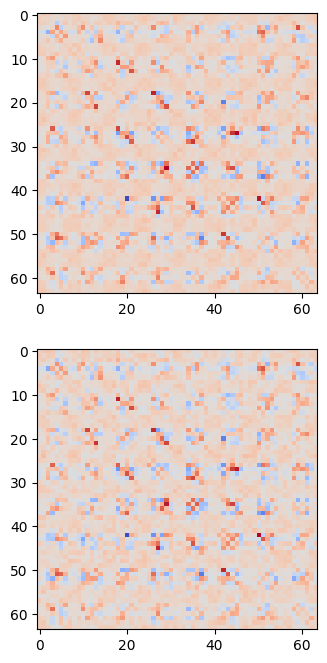

In [9]:


evidence_level = 11
inverse_temperature = 0.1668

# Find the entry in performance_results that matches the specified evidence_level and inverse_temperature
matching_entry = None
for i, entry in enumerate(performance_results):
    # Use np.isclose for floating point comparison
    if np.isclose(entry['params']['evidence_level'], evidence_level, rtol=0.01) and \
       np.isclose(entry['params']['inverse_temperature'], inverse_temperature, rtol=0.01):
        matching_entry = entry
        break

print(matching_entry)

training_output_modified = deepcopy(results[i]['training_output'])

nw = deepcopy(matching_entry['nw'])

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].imshow(nw.get_J(), cmap='coolwarm')


num_steps = 50000 # just like during training
learning_rate = 0.001 # just like during training
inverse_temperature = 1 # increased

for i in range(num_steps): #keep on running with zero bias
    nw.update(inverse_temperature=inverse_temperature, learning_rate=learning_rate, least_action=False)

axs[1].imshow(nw.get_J(), cmap='coolwarm')